# Confusion Matrix Measurements

$$
\begin{align*}\text{Precision} &= \frac{TP}{TP+FP}\end{align*}
$$

$$
\text{Recall(Sensitivity/TPR)} =\frac{TP}{TP+FN} 
$$

$$
F_{\beta} =\frac{(1+\beta^2).p.r}{(\beta^2p)+r} 
$$

$$
TNR(Specificity) = \frac{TN}{TN+FP}
$$

$$
FPR = 1-Sensitivity
$$

$$
FNR = 1-Specificity
$$

- F Beta measure :
    - If beta <1 , more weight to precision
    - If beta >1, more weight to recall
    - If beta =1 , balances precision and recall

# AUC & Gini

- ROC Curve plots TPR vs FPR at different classification thresholds. AUC provides an aggregate measure of performance across all possible classification thresholds.
- AUC is classification threshold variant


- Gini index can be defined as follows; has a range of (0,1)

$$
Gini = 2.AUC-1
$$

- If AUC =85%, this means that when randomly selecting one positive sample and one negative sample, the positive sample will have a higher predicted probability score 85% of the time.
- AUC does not capture the strength of confidence, only the ranking correctness.
- AUC ~ (0.5 to 1)

# **Multi Class Confusion Matrix**

| Predicted ⬇️ | Apple | Orange | Mango | Total |
| --- | --- | --- | --- | --- |
| Apple | 7 | 8 | 9 | 24 |
| Orange | 1 | 2 | 3 | 6 |
| Mango | 3 | 2 | 1 | 6 |
| Total | 11 | 12 | 13 | 36 |

|  | TP | FP | FN | TN |
| --- | --- | --- | --- | --- |
| Apple | 7 | 17 | 4 | 8 |
| Orange | 2 | 4 | 10 | 20 |
| Mango | 1 | 5 | 12 | 18 |
| Total | 10 | 26 | 26 | 46 |

# Micro and Macro Measurements

**Macro Averaging** : computes the precision and recall for each class separately. Then take the unweighted average across all categories. This method gives importance to all classes equally. 

**Micro Averaging** : Computes total of TP,TN,FP,FN across all levels, then computes precision and recall from these totals. This method gives more weight to larger classes. 

**Weighted Averaging**: This is similar to the macro averaging but instead of treating all classes equally , it weights by the number of instances in that class. 

Weight of apple class = 11/36

Reducing FP → Increase Precision ( Give priority to Precision)

Reducing FN → Increase Recall 

# KS Statistic (Kolmogorov-Smirnov)

- KS measures the maximum separation between the cumulative distribution function of the predicted scores for positive and negative classes.
- How well does the model separate the two classes ?
- Algorithm
    - Get predicted probabilities
    - Separate positive and negatives ( based on actual)
        
$$
CDF_{\text{Pos}} = \text{\% of +vs with score } <=p
$$

$$
CDF_{\text{Neg}} = \text{\% of -vs with score } <=p
$$


$$
KS = \max_p | CDF_{\text{pos}} -CDF_{\text{neg}}|
$$

- KS ranges from 0 to 1
- Higher KS → Better separation between classes.

Confusion Matrix Metrics:
TP: 4
TN: 5
FP: 1
FN: 2
Precision: 0.800
Recall: 0.667
F1: 0.727
Specificity: 0.833
FPR: 0.167
FNR: 0.333


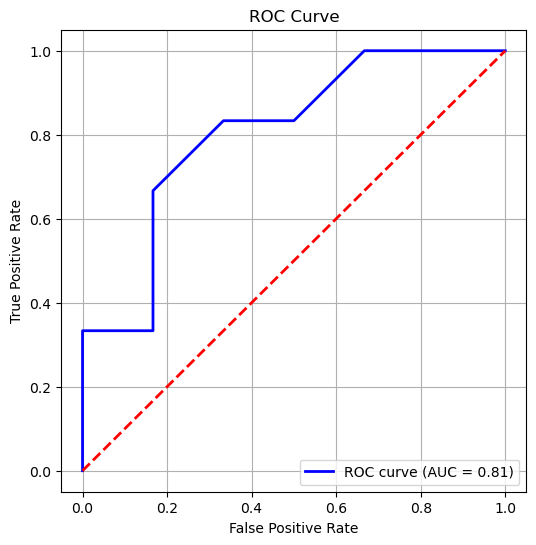

AUC: 0.806, Gini: 0.611
KS Statistic: 0.500 at threshold 0.30


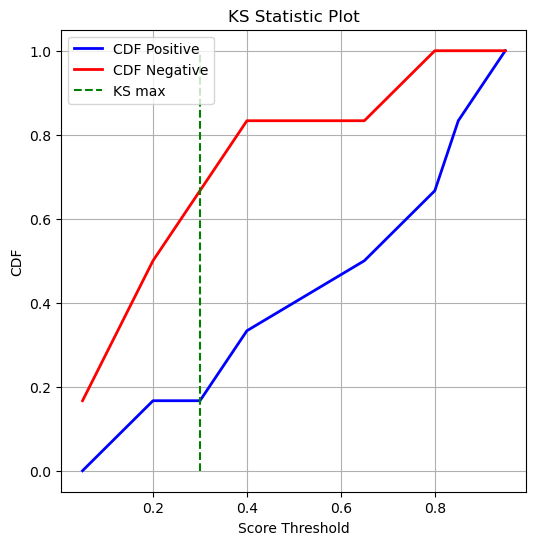

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# -----------------------------
# Sample dataset
# -----------------------------
# Actual labels (binary: 1 = positive, 0 = negative)
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])
# Predicted probabilities (from a classifier)
y_scores = np.array([0.2, 0.8, 0.4, 0.65, 0.3, 0.4, 0.95, 0.2, 0.7, 0.05, 0.15, 0.85])
# Predicted classes using 0.5 threshold
y_pred = (y_scores >= 0.5).astype(int)

# -----------------------------
# Confusion matrix calculations
# -----------------------------
def confusion_matrix_metrics(y_true, y_pred, beta=1):
    """
    Computes precision, recall, F1, specificity, FPR, FNR
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    fbeta = (1 + beta**2) * precision * recall / (beta**2 * precision + recall) if (precision + recall) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    FPR = 1 - specificity
    FNR = 1 - recall
    
    return {
        "TP": TP, "TN": TN, "FP": FP, "FN": FN,
        "Precision": precision,
        "Recall": recall,
        f"F{beta}": fbeta,
        "Specificity": specificity,
        "FPR": FPR,
        "FNR": FNR
    }

metrics = confusion_matrix_metrics(y_true, y_pred)
print("Confusion Matrix Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.3f}" if isinstance(v, float) else f"{k}: {v}")

# -----------------------------
# ROC curve, AUC, Gini
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
gini = 2 * roc_auc - 1

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {roc_auc:.3f}, Gini: {gini:.3f}")

# -----------------------------
# KS Statistic
# -----------------------------
def ks_statistic(y_true, y_scores):
    """
    Computes the KS statistic and returns value and threshold
    """
    pos_scores = y_scores[y_true == 1]
    neg_scores = y_scores[y_true == 0]
    
    thresholds = np.sort(np.unique(y_scores))
    ks_max = 0
    ks_thresh = 0
    
    for t in thresholds:
        cdf_pos = np.mean(pos_scores <= t)
        cdf_neg = np.mean(neg_scores <= t)
        ks = abs(cdf_pos - cdf_neg)
        if ks > ks_max:
            ks_max = ks
            ks_thresh = t
    return ks_max, ks_thresh

ks_value, ks_threshold = ks_statistic(y_true, y_scores)
print(f"KS Statistic: {ks_value:.3f} at threshold {ks_threshold:.2f}")

# KS Plot
plt.figure(figsize=(6,6))
cdf_pos = [np.mean(y_scores[y_true == 1] <= t) for t in thresholds]
cdf_neg = [np.mean(y_scores[y_true == 0] <= t) for t in thresholds]
plt.plot(thresholds, cdf_pos, label='CDF Positive', color='blue', lw=2)
plt.plot(thresholds, cdf_neg, label='CDF Negative', color='red', lw=2)
plt.vlines(x=ks_threshold, ymin=min(cdf_pos+cdf_neg), ymax=max(cdf_pos+cdf_neg), colors='green', linestyle='--', label='KS max')
plt.xlabel('Score Threshold')
plt.ylabel('CDF')
plt.title('KS Statistic Plot')
plt.legend()
plt.grid(True)
plt.show()
